# The CAPM Formula
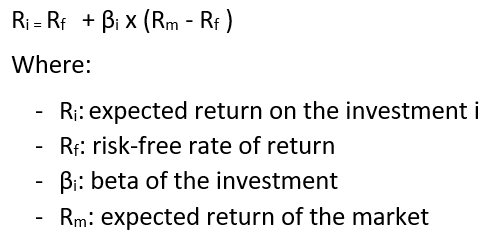
Beta is calculated as:

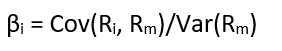

A nice visualisation of CAPM is as follow:
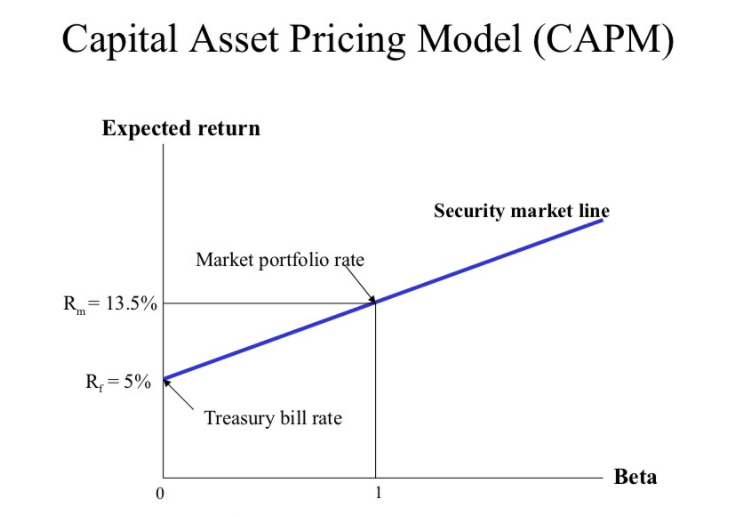

In [1]:
import pandas as pd
import pandas_datareader.data as web
import yfinance as yf
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import getFamaFrenchFactors as gff
import statsmodels.api as sm

# 1. Download stock prices and Fama-French 3 factors using Python codes.

In [2]:
# To obtain the data of the five stocks, we will use the pandas_datareader.data to obtain the various stocks from yahoo

# we will acquire the stock data over the past five years starting from 2018,7,31 down to 2022,7,31
start = dt.datetime(2021,1,30)
end = dt.datetime(2022,10,31)

# Define the selected tickers in a list and use it to fetch the stock data from Yahoo Finance.
tickers = ['GOOG','AAPL', 'TSLA', 'MSFT', 'CAT']

In [3]:
#Extract the adjusted close prices from the stock data
#df = web.get_data_yahoo(tickers, start, end)
df = yf.download(tickers, start, end )
df.head()

[*********************100%***********************]  5 of 5 completed


Adj Close                                                  \
                  AAPL         CAT        GOOG        MSFT        TSLA   
Date                                                                     
2021-02-01  132.548828  177.725113   95.067497  235.451660  279.936676   
2021-02-02  133.388748  185.210495   96.375504  235.314117  290.929993   
2021-02-03  132.351212  184.200272  103.503502  238.742981  284.896667   
2021-02-04  135.760284  184.392670  103.118500  237.770309  283.329987   
2021-02-05  135.339676  185.691559  104.900002  237.956970  284.076660   

                 Close                                                  ...  \
                  AAPL         CAT        GOOG        MSFT        TSLA  ...   
Date                                                                    ...   
2021-02-01  134.139999  184.720001   95.067497  239.649994  279.936676  ...   
2021-02-02  134.990005  192.500000   96.375504  239.509995  290.929993  ...   
2021-02-03  133.940002  191.449997  103.503502  243.000000  284.896667  ...   
2021-02-04  137.389999  191.649994  103.118500  242.009995  283.329987  ...   
2021-02-05  136.759995  193.000000  104.900002  242.199997  284.076660  ...   

                  Open                                                  \
                  AAPL         CAT        GOOG        MSFT        TSLA   
Date                                                                     
2021-02-01  133.750000  185.960007   92.678497  235.059998  271.429993   
2021-02-02  135.729996  186.500000   96.127998  241.300003  281.559998   
2021-02-03  135.759995  190.910004  103.650002  239.570007  292.339996   
2021-02-04  136.300003  192.000000  103.444504  242.660004  285.000000   
2021-02-05  137.350006  192.520004  103.500000  242.229996  281.666656   

               Volume                                         
                 AAPL      CAT      GOOG      MSFT      TSLA  
Date                                                          
2021-02-01  106239800  2738200  32044000  33314200  76174200  
2021-02-02   83305400  5265400  45474000  25916300  73038600  
2021-02-03   89880900  2979000  82364000  27158100  55030500  
2021-02-04   84183100  2253800  37046000  25296100  47438100  
2021-02-05   75693800  2240000  30702000  18054800  55699800  

[5 rows x 30 columns]

In [4]:
df.shape

(441, 30)

In [5]:
df = df['Adj Close']
df.head()

,AAPL,CAT,GOOG,MSFT,TSLA
Date,,,,,
2021-02-01,132.548828,177.725113,95.067497,235.451660,279.936676
2021-02-02,133.388748,185.210495,96.375504,235.314117,290.929993
2021-02-03,132.351212,184.200272,103.503502,238.742981,284.896667
2021-02-04,135.760284,184.392670,103.118500,237.770309,283.329987
2021-02-05,135.339676,185.691559,104.900002,237.956970,284.076660


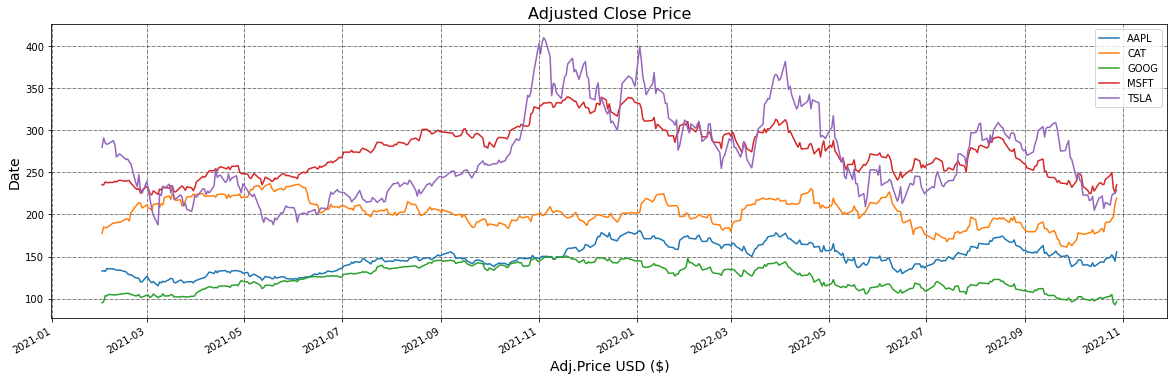

In [6]:
df.plot(figsize=(20, 6))

# Define the label for the title of the figure
plt.title("Adjusted Close Price", fontsize=16)

# Define the labels for x-axis and y-axis
plt.ylabel('Date', fontsize=14)
plt.xlabel('Adj.Price USD ($)', fontsize=14)

# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)

# Show the legend
plt.legend()

plt.show()

In [7]:
#We'll Use the pct_change function to calculate the percentage difference of monthly price compared with the previous month.
#The percentage difference is used as the monthly rate of stock return 
returns = df.pct_change()[1:]
returns 

,AAPL,CAT,GOOG,MSFT,TSLA
Date,,,,,
2021-02-02,0.006337,0.042118,0.013759,-0.000584,0.039271
2021-02-03,-0.007778,-0.005454,0.073961,0.014571,-0.020738
2021-02-04,0.025758,0.001045,-0.003720,-0.004074,-0.005499
2021-02-05,-0.003098,0.007044,0.017276,0.000785,0.002635
2021-02-08,0.001097,0.023057,-0.002426,0.001115,0.013130
...,...,...,...,...,...
2022-10-24,0.014803,0.005678,0.014683,0.021188,-0.014876
2022-10-25,0.019338,0.018505,0.019035,0.013792,0.052876
2022-10-26,-0.019627,0.010881,-0.096350,-0.077156,0.009981


In [8]:
# we will resample our acquired stock data to convert them into monthly prices. 
# we use the dropna function to remove any row with null values.
returns_monthly = returns.resample('M').last().dropna()
returns_monthly.head()

,AAPL,CAT,GOOG,MSFT,TSLA
Date,,,,,
2021-02-28,0.002232,-0.026779,0.002708,0.014804,-0.009850
2021-03-31,0.018766,-0.005191,0.006368,0.016908,0.050832
2021-04-30,-0.015133,0.002813,-0.008136,-0.001307,0.047917
2021-05-31,-0.005348,-0.000829,0.003767,0.001484,-0.008925
2021-06-30,0.004621,0.011762,-0.005575,-0.001842,-0.001557


In [9]:
returns_monthly.shape

(21, 5)

# Fama-French 3 factors model
Developed in 1992 by University of Chicago professors Eugene Fama and Kenneth French, it is based on the observation that value shares tend to outperform growth shares and small-cap shares tend to outperform large-cap shares. Jumping off those observations the two economists developed their three-factor model as an expansion of the Capital Asset Pricing model (CAPM). Rather than just gauge market risk as the CAPM does, the Fama-French Three Factor model adds value risk and size risk to the calculation.

The Fama-French Three Factor model calculates an investment’s likely rate of return based on three elements:

overall market risk,
the degree to which small companies outperform large companies and
the degree to which high-value companies outperform low-value companies.
Fama-French 3 factors formula:

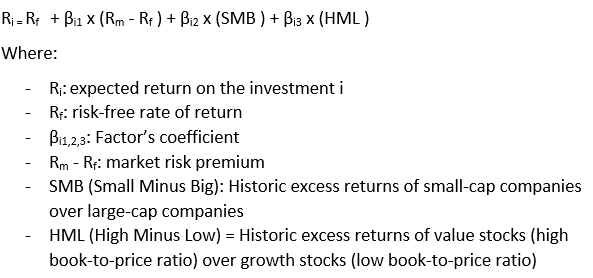

# Fama-French regression
The regression equation can be written as:



In [10]:
#downloading fama french data
ff = web.DataReader('F-F_Research_Data_Factors', 'famafrench', start, end)[0]
ff.head(2)

,Mkt-RF,SMB,HML,RF
Date,,,,
2021-01,-0.03,7.34,2.96,0.01
2021-02,2.78,2.06,7.18,0.00


In [11]:
ff = ff[1:]
ff.shape

(21, 4)

In [12]:
# printing the shape of the stocks and fama french 3 factor model.
# from the data, we have equal row and columns from both stocks and fama french 3 factor 
print(returns_monthly.shape)
print(ff.shape)

(21, 5)
(21, 4)


In [13]:
# getting same index for monthly stocks and fama french 3 factor
returns_monthly.index = ff.index
returns_monthly.head()

,AAPL,CAT,GOOG,MSFT,TSLA
Date,,,,,
2021-02,0.002232,-0.026779,0.002708,0.014804,-0.009850
2021-03,0.018766,-0.005191,0.006368,0.016908,0.050832
2021-04,-0.015133,0.002813,-0.008136,-0.001307,0.047917
2021-05,-0.005348,-0.000829,0.003767,0.001484,-0.008925
2021-06,0.004621,0.011762,-0.005575,-0.001842,-0.001557


# 2. Merge/combine the datasets

**Note: The expression “Mkt-RF” refers to the market premium. Market premium is the difference between the expected return on a market portfolio and the risk-free rate.**

In [14]:
# Merging stocks return and fama french 3 factor on Date
merge = pd.merge(returns_monthly, ff, on = 'Date')
merge

,AAPL,CAT,GOOG,MSFT,TSLA,Mkt-RF,SMB,HML,RF
Date,,,,,,,,,
2021-02,0.002232,-0.026779,0.002708,0.014804,-0.009850,2.78,2.06,7.18,0.00
2021-03,0.018766,-0.005191,0.006368,0.016908,0.050832,3.08,-2.37,7.40,0.00
2021-04,-0.015133,0.002813,-0.008136,-0.001307,0.047917,4.93,-3.19,-0.94,0.00
2021-05,-0.005348,-0.000829,0.003767,0.001484,-0.008925,0.29,-0.25,7.08,0.00
2021-06,0.004621,0.011762,-0.005575,-0.001842,-0.001557,2.75,1.70,-7.82,0.00
2021-07,0.001511,-0.027333,-0.009664,-0.005550,0.014542,1.27,-3.99,-1.76,0.00
2021-08,-0.008425,-0.002743,-0.000052,-0.005633,0.006581,2.91,-0.43,-0.16,0.00
2021-09,-0.009312,-0.029818,-0.009333,-0.007324,-0.007462,-4.37,0.72,5.08,0.00
2021-10,-0.018155,-0.000392,0.014655,0.022414,0.034316,6.65,-2.35,-0.48,0.00


In [15]:
# Diving Fama french library by 100 to be on the same scale with the stocks return
merge[['Mkt-RF','SMB','HML','RF']] = merge[['Mkt-RF','SMB','HML','RF']] / 100
# rename column:
merge.rename(columns = {'Mkt-RF': 'Mkt_RF'}, inplace = True)

merge

,AAPL,CAT,GOOG,MSFT,TSLA,Mkt_RF,SMB,HML,RF
Date,,,,,,,,,
2021-02,0.002232,-0.026779,0.002708,0.014804,-0.009850,0.0278,0.0206,0.0718,0.0000
2021-03,0.018766,-0.005191,0.006368,0.016908,0.050832,0.0308,-0.0237,0.0740,0.0000
2021-04,-0.015133,0.002813,-0.008136,-0.001307,0.047917,0.0493,-0.0319,-0.0094,0.0000
2021-05,-0.005348,-0.000829,0.003767,0.001484,-0.008925,0.0029,-0.0025,0.0708,0.0000
2021-06,0.004621,0.011762,-0.005575,-0.001842,-0.001557,0.0275,0.0170,-0.0782,0.0000
2021-07,0.001511,-0.027333,-0.009664,-0.005550,0.014542,0.0127,-0.0399,-0.0176,0.0000
2021-08,-0.008425,-0.002743,-0.000052,-0.005633,0.006581,0.0291,-0.0043,-0.0016,0.0000
2021-09,-0.009312,-0.029818,-0.009333,-0.007324,-0.007462,-0.0437,0.0072,0.0508,0.0000
2021-10,-0.018155,-0.000392,0.014655,0.022414,0.034316,0.0665,-0.0235,-0.0048,0.0000


# 3. Produce and discuss the covarience matrix and summary statistics of stock returns during the sample period.

covarience is a mathemimatical concept that is mostly use in statictics. it determines how amount two random variables varies or move together. it is the direction or relationship between two asset prices 

In [16]:
# Getting Coveriance matrix for the stocks return
cov_matrix = returns_monthly.cov()
cov_matrix 

,AAPL,CAT,GOOG,MSFT,TSLA
AAPL,0.000631,0.000274,0.000321,0.000304,0.000346
CAT,0.000274,0.000391,0.000211,0.000165,0.000279
GOOG,0.000321,0.000211,0.000333,0.000295,0.000312
MSFT,0.000304,0.000165,0.000295,0.000307,0.000282
TSLA,0.000346,0.000279,0.000312,0.000282,0.001169


**Variance is define as how a set of observation defers from one another. note the square root of varience is volatility**

In [17]:
# Getting the variance for the stock returns
returns_monthly.var()

AAPL    0.000631
CAT     0.000391
GOOG    0.000333
MSFT    0.000307
TSLA    0.001169
dtype: float64

**Coveriance Map**

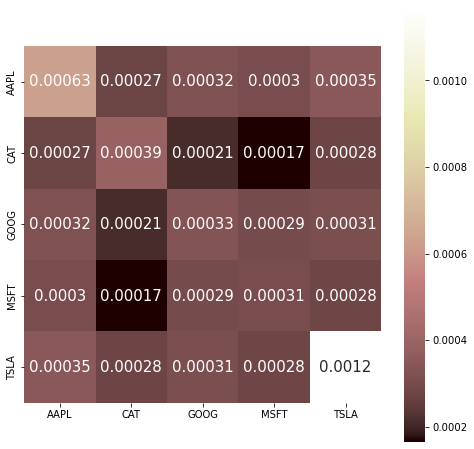

In [18]:
plot = plt.figure(figsize=(8,8))
sns.heatmap(returns_monthly.cov(), cmap='pink', cbar=True, square=True, annot=True, annot_kws={'size':15})
plt.show()

**Correlation Map**

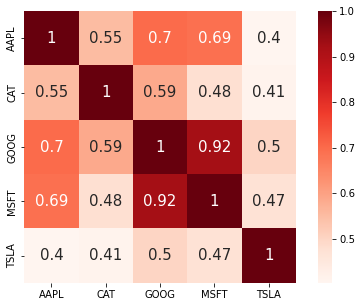

In [19]:
plot = plt.figure(figsize=(8,5))
sns.heatmap(returns_monthly.corr(), cmap='Reds', cbar=True, square=True, annot=True, annot_kws={'size':15})
plt.show()

**Statistical Summary**

In [20]:
# Statistical Summary
returns_monthly.describe()

,AAPL,CAT,GOOG,MSFT,TSLA
count,21.000000,21.000000,21.000000,21.000000,21.000000
mean,0.000785,-0.002808,-0.002728,-0.001233,0.014980
std,0.025116,0.019783,0.018244,0.017510,0.034196
min,-0.036605,-0.029818,-0.037224,-0.041812,-0.017579
25%,-0.015133,-0.011929,-0.009664,-0.008841,-0.008925
50%,-0.005346,-0.002743,-0.005575,-0.005014,-0.001557
75%,0.004621,0.002780,0.006368,0.008824,0.034316
max,0.075553,0.055419,0.042981,0.040220,0.106776


# 4. Consider the collection of stocks in your data sample as a portfolio. Perform portfolio optimization to show: (1) portfolio with the lowest risk, (2) portfolio with the highest return and (3) portfolio with the highest sharpe ratio.

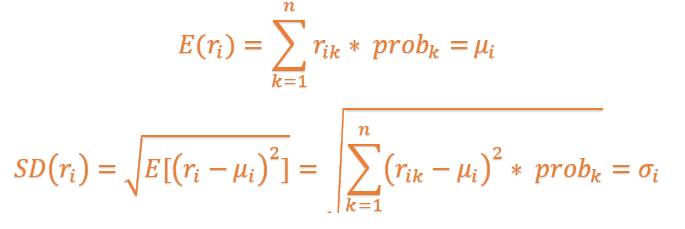
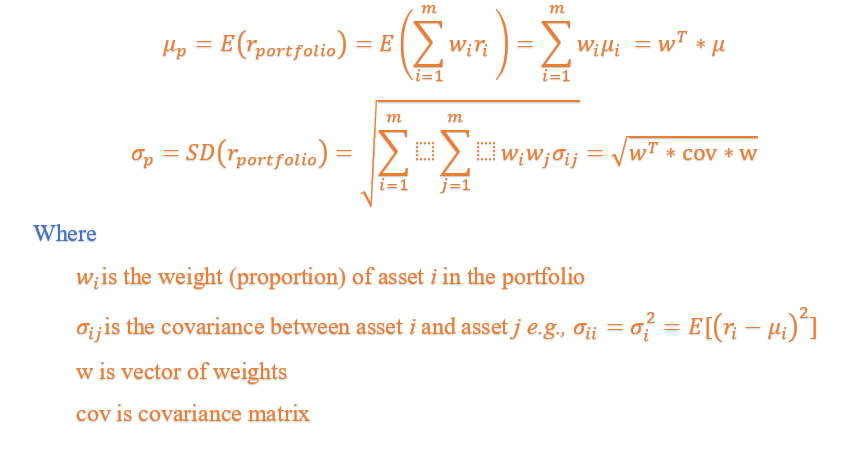

In [127]:
#portfolio Optimization

portfolio_returns = []
portfolio_risks = []
sharp_ratios = []
portfolio_weights = []

RF = 0.01

number_of_portfolios = 4500
    
for portfolio in range(number_of_portfolios):
    
    # Generate random portfolio weights
    weights = np.random.random_sample(len(tickers))
    
    # all the weight did not round up to 1 and for us to do this we 
    # need to summarize the whole weight and divide the indiviadual by the total
    weights = np.round((weights / np.sum(weights)), 3)
    portfolio_weights.append(weights)
    
    #calculate annual return
    annual_return = np.sum(returns.mean() * weights) * 252
    portfolio_returns.append(annual_return)
    
    #matrix covariance & portfolio risk calculation
    matrix_covariance = returns.cov() * 252
    portfolio_variance = np.dot(weights.T, np.dot(matrix_covariance, weights))
    portfolio_standard_deviation = np.sqrt(portfolio_variance)
    portfolio_risks.append(portfolio_standard_deviation)
    
    #Sharp ratio
    sharp_ratio = (annual_return - RF / portfolio_standard_deviation)
    sharp_ratios.append(sharp_ratio) 
    
portfolio_returns = np.array(portfolio_returns)
portfolio_risks = np.array(portfolio_risks)
sharp_ratios = np.array(sharp_ratios)

portfolio_metrics = [portfolio_returns, portfolio_risks,sharp_ratios, portfolio_weights]

portfolios_df = pd.DataFrame(portfolio_metrics).T
portfolios_df.columns = ['Return', 'Risk', 'Sharp','Weights']

lowest_risk = portfolios_df.iloc[portfolios_df['Risk']
                                .astype(float).idxmin()]
highest_return = portfolios_df.iloc[portfolios_df['Return']
                                .astype(float).idxmin()]

highest_sharpe_ratio  = portfolios_df.iloc[portfolios_df['Sharp']
                                .astype(float).idxmin()]
print("matrix_covariance:")
print(matrix_covariance)
print("......")
print("portfolio_variance:",portfolio_variance)
print("......")
print("portfolio_standard_deviation:",portfolio_standard_deviation)
print("......")
print("weights:",weights )

matrix_covariance:
          AAPL       CAT      GOOG      MSFT      TSLA
AAPL  0.087998  0.025332  0.065109  0.064787  0.103391
CAT   0.025332  0.092643  0.027599  0.021993  0.041433
GOOG  0.065109  0.027599  0.097354  0.070634  0.087013
MSFT  0.064787  0.021993  0.070634  0.079864  0.087935
TSLA  0.103391  0.041433  0.087013  0.087935  0.356306
......
portfolio_variance: 0.092095737623719
......
portfolio_standard_deviation: 0.303472795524935
......
weights: [0.458 0.112 0.186 0.003 0.242]


# Portfolio with the highest Sharpe ratio

Sharpe ratio:
- Represents both the risk and return
- Developed by Nobel laureate William F. Sharpe and is used to help investors understand the return of an investment compared to its risk.<br>
The Sharpe ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk. The formula used to calculate Sharpe-ratio is given below:
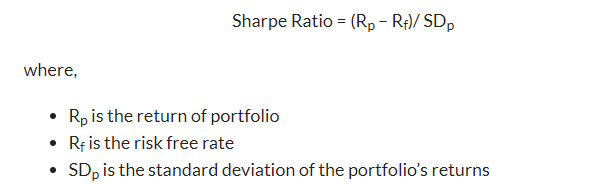

In [22]:
#lowest_risk
print('lowest_risk')
print(lowest_risk)
print(tickers)
print("")

#highest_return
print('highest_return')
print(highest_return)
print(tickers)
print("")

#highest_sharpe_ratio
print('highest_sharpe_ratio')
print(highest_sharpe_ratio)
print(tickers)
print("")

lowest_risk
Return                                0.118328
Risk                                  0.230673
Sharp                                 0.074977
Weights    [0.297, 0.393, 0.017, 0.287, 0.006]
Name: 1584, dtype: object
['GOOG', 'AAPL', 'TSLA', 'MSFT', 'CAT']

highest_return
Return                              0.051961
Risk                                0.345385
Sharp                               0.023008
Weights    [0.018, 0.015, 0.05, 0.547, 0.37]
Name: 790, dtype: object
['GOOG', 'AAPL', 'TSLA', 'MSFT', 'CAT']

highest_sharpe_ratio
Return                                0.052081
Risk                                  0.279917
Sharp                                 0.016357
Weights    [0.039, 0.011, 0.337, 0.549, 0.064]
Name: 2590, dtype: object
['GOOG', 'AAPL', 'TSLA', 'MSFT', 'CAT']



# Visualization

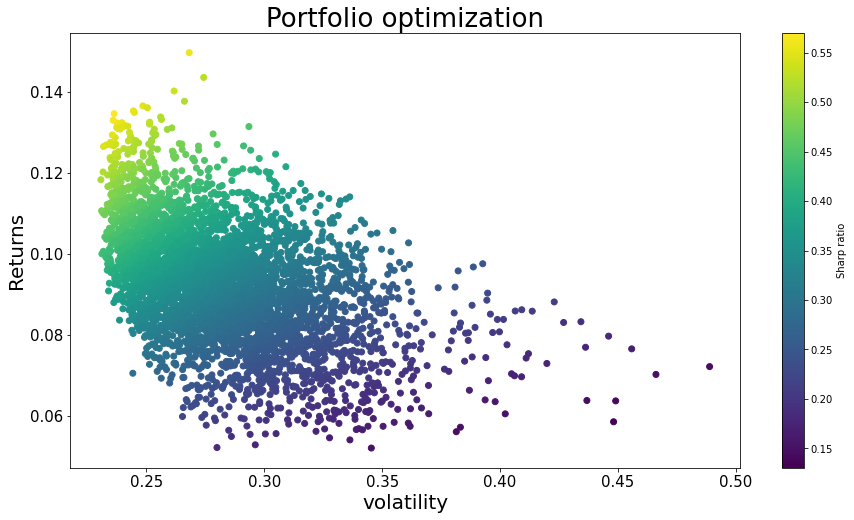

In [23]:
plt.figure(figsize = (15,8))
plt.scatter(portfolio_risks, portfolio_returns,
            c = portfolio_returns / portfolio_risks)

plt.title('Portfolio optimization', fontsize =26)
plt.xlabel('volatility', fontsize = 20)
plt.ylabel('Returns', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.colorbar(label = 'Sharp ratio')

plt.show()

# 5. Estimate the empirical asset pricing models for a single stock. Visualise the results i.e., plot the data points and the estimated regression line on a figure(s) and discuss your results.

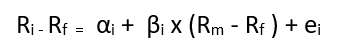


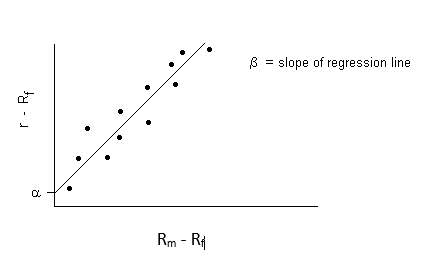

Note that, except for alpha, this is the equation for CAPM - that is, the beta you get from Sharpe's derivation of equilibrium prices is essentially the same beta you get from doing a least-squares regression against the data.

Beta is the slope of this line. Alpha, the vertical intercept, tells you how much better/worse the investment did than CAPM predicted.

In [24]:
# generate Google excess return:
merge['GOOG_Rf'] = merge['GOOG'] - merge['RF']

merge

,AAPL,CAT,GOOG,MSFT,TSLA,Mkt_RF,SMB,HML,RF,GOOG_Rf
Date,,,,,,,,,,
2021-02,0.002232,-0.026779,0.002708,0.014804,-0.009850,0.0278,0.0206,0.0718,0.0000,0.002708
2021-03,0.018766,-0.005191,0.006368,0.016908,0.050832,0.0308,-0.0237,0.0740,0.0000,0.006368
2021-04,-0.015133,0.002813,-0.008136,-0.001307,0.047917,0.0493,-0.0319,-0.0094,0.0000,-0.008136
2021-05,-0.005348,-0.000829,0.003767,0.001484,-0.008925,0.0029,-0.0025,0.0708,0.0000,0.003767
2021-06,0.004621,0.011762,-0.005575,-0.001842,-0.001557,0.0275,0.0170,-0.0782,0.0000,-0.005575
2021-07,0.001511,-0.027333,-0.009664,-0.005550,0.014542,0.0127,-0.0399,-0.0176,0.0000,-0.009664
2021-08,-0.008425,-0.002743,-0.000052,-0.005633,0.006581,0.0291,-0.0043,-0.0016,0.0000,-0.000052
2021-09,-0.009312,-0.029818,-0.009333,-0.007324,-0.007462,-0.0437,0.0072,0.0508,0.0000,-0.009333
2021-10,-0.018155,-0.000392,0.014655,0.022414,0.034316,0.0665,-0.0235,-0.0048,0.0000,0.014655


**Note: Beta is a measure of the volatility of a security in comparison to the market as a whole. This is important to understand what beta tells us:**

If beta = 1.0, the security (e.g. stock) price is perfectly correlated with the market.
If beta < 1.0, the security is less volatile than the market
If beta > 1.0, the security is more volatile than the market.


The beta can be estimated using a linear regression approach. We can reshape the CAPM formula and obtain a linear equation as below:


**Ra = Rf + B(Mkt - Rf) + C**


**y = BX + C**

**Where**

        y = Ra - Rf
   
        B = Beta of the stock
        
        X = Mkt - Rf (Market Return)
        
        C = constant

### GOOG-Rf

**We'll be Using the Python Stats package to estimate the beta and also we will make use of the stats OLS function to build a linear model by fetching the y and C parameters to the function. Next, display the regression summary.**

# **CAMP Regression**

In [41]:
# construct independent variable:
GOOG_Rf_Xx = merge['Mkt_RF']

# construct dependent variable:
GOOG_Rf_yy = merge['GOOG_Rf']

# add constant:
GOOG_Rf_X11 = sm.add_constant(GOOG_Rf_Xx)

# run regression:
GOOG_model1 = sm.OLS(GOOG_Rf_yy, GOOG_Rf_X11).fit()

# output results:
print(GOOG_model1.summary())

#GOOG_intercept and GOOG_beta
GOOG_intercept1, GOOG_beta= GOOG_model1.params

# predict GOOG_predicted
GOOG_predicted1 = GOOG_model1._results.predict(GOOG_Rf_X11)

                            OLS Regression Results                            
Dep. Variable:                GOOG_Rf   R-squared:                       0.379
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     11.59
Date:                Sun, 18 Dec 2022   Prob (F-statistic):            0.00298
Time:                        12:48:09   Log-Likelihood:                 59.989
No. Observations:                  21   AIC:                            -116.0
Df Residuals:                      19   BIC:                            -113.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0033      0.003     -1.049      0.3

C:\Users\PC\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


**From the summary result, we can look for the coefficient of the “Mkt-RF” and use it as our beta value. The result above shows that the beta is 1.0931**


With the risk-free rate, the rate of market return, and the beta ready, we can now proceed to estimate the expected return on Google stock by applying the formula

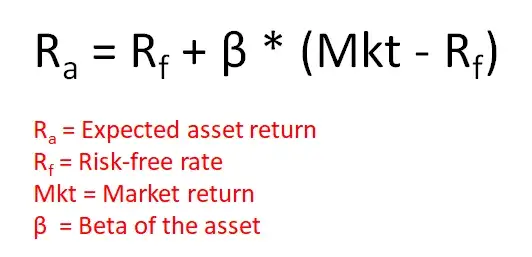

In [42]:
rf = merge['RF'].mean()
market_premium = merge['Mkt_RF'].mean()

expected_monthly_return = rf + GOOG_beta * market_premium
expected_yearly_return = expected_monthly_return * 12

print("Expected monthly return: %f"%(expected_monthly_return))
print("Expected yearly return: %f"%(expected_yearly_return))


Expected monthly return: 0.000617
Expected yearly return: 0.007407


# Fama French Regression

In [62]:
# construct independent variable:
GOOG_Rf_X = merge[['Mkt_RF','SMB','HML']]

# construct dependent variable:
GOOG_Rf_y = merge['GOOG_Rf']

# add constant:
GOOG_Rf_X1 = sm.add_constant(GOOG_Rf_X )

# run regression:
GOOG_model = sm.OLS(GOOG_Rf_y, GOOG_Rf_X1).fit()

# output results:
print(GOOG_model.summary())

#GOOG_intercept and GOOG_beta
GOOG_intercept, GOOG_beta1, GOOG_beta2, GOOG_beta3 = GOOG_model.params

# predict GOOG_predicted
GOOG_predicted = GOOG_model._results.predict(GOOG_Rf_X1)

                            OLS Regression Results                            
Dep. Variable:                GOOG_Rf   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.583
Method:                 Least Squares   F-statistic:                     10.32
Date:                Sun, 18 Dec 2022   Prob (F-statistic):           0.000421
Time:                        12:59:03   Log-Likelihood:                 65.879
No. Observations:                  21   AIC:                            -123.8
Df Residuals:                      17   BIC:                            -119.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0067      0.003     -2.405      0.0

C:\Users\PC\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [63]:
rf = merge['RF'].mean()
market_premium = merge['Mkt_RF'].mean()
size_premium = merge['SMB'].mean()
value_premium = merge['HML'].mean()

expected_monthly_return = rf + GOOG_beta1 * market_premium + GOOG_beta2 * size_premium + GOOG_beta3 * value_premium
expected_yearly_return = expected_monthly_return * 12

print("Expected monthly return: %f"%(expected_monthly_return))
print("Expected yearly return: %f"%(expected_yearly_return))


Expected monthly return: 0.004000
Expected yearly return: 0.047995


# Visualise the regression result

<AxesSubplot:xlabel='Mkt_RF'>

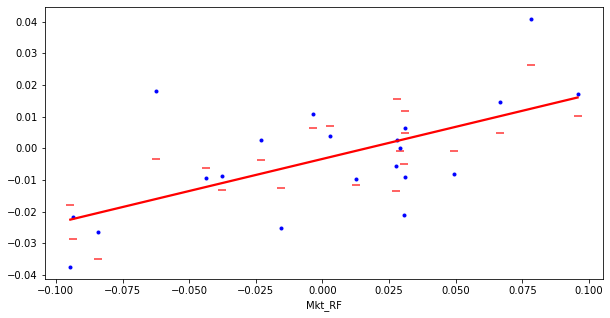

In [87]:
plt.figure(figsize=(10,5))
plt.plot(merge['Mkt_RF'], GOOG_Rf_y, 'b.')
sns.regplot(x=GOOG_Rf_Xx, y= GOOG_predicted, data=merge, ci=None, scatter_kws={"s": 80}, marker= '_', color='red')

# 6. Estimate the empirical asset pricing models for the entire sample (portfolio), visualise the results i.e., plot the data points and the estimated regression line on figures and discuss your results.

In [56]:
# generate AAple excess return:
merge['AAPl_Rf'] = merge['AAPL'] - merge['RF']

# generate Microdoft excess return:
merge['MSFT_Rf'] = merge['MSFT'] - merge['RF']

# generate Tesla excess return:
merge['TSLA_Rf'] = merge['TSLA'] - merge['RF']

# generate CAT excess return:
merge['CAT_Rf'] = merge['CAT'] - merge['RF']

merge

,AAPL,CAT,GOOG,MSFT,TSLA,Mkt_RF,SMB,HML,RF,GOOG_Rf,AAPl_Rf,MSFT_Rf,TSLA_Rf,CAT_Rf
Date,,,,,,,,,,,,,,
2021-02,0.002232,-0.026779,0.002708,0.014804,-0.009850,0.0278,0.0206,0.0718,0.0000,0.002708,0.002232,0.014804,-0.009850,-0.026779
2021-03,0.018766,-0.005191,0.006368,0.016908,0.050832,0.0308,-0.0237,0.0740,0.0000,0.006368,0.018766,0.016908,0.050832,-0.005191
2021-04,-0.015133,0.002813,-0.008136,-0.001307,0.047917,0.0493,-0.0319,-0.0094,0.0000,-0.008136,-0.015133,-0.001307,0.047917,0.002813
2021-05,-0.005348,-0.000829,0.003767,0.001484,-0.008925,0.0029,-0.0025,0.0708,0.0000,0.003767,-0.005348,0.001484,-0.008925,-0.000829
2021-06,0.004621,0.011762,-0.005575,-0.001842,-0.001557,0.0275,0.0170,-0.0782,0.0000,-0.005575,0.004621,-0.001842,-0.001557,0.011762
2021-07,0.001511,-0.027333,-0.009664,-0.005550,0.014542,0.0127,-0.0399,-0.0176,0.0000,-0.009664,0.001511,-0.005550,0.014542,-0.027333
2021-08,-0.008425,-0.002743,-0.000052,-0.005633,0.006581,0.0291,-0.0043,-0.0016,0.0000,-0.000052,-0.008425,-0.005633,0.006581,-0.002743
2021-09,-0.009312,-0.029818,-0.009333,-0.007324,-0.007462,-0.0437,0.0072,0.0508,0.0000,-0.009333,-0.009312,-0.007324,-0.007462,-0.029818
2021-10,-0.018155,-0.000392,0.014655,0.022414,0.034316,0.0665,-0.0235,-0.0048,0.0000,0.014655,-0.018155,0.022414,0.034316,-0.000392


# **CAT STOCK**

**CAMP**

In [88]:
# construct independent variable:
CAT_Rf_Xx = merge['Mkt_RF']

# construct dependent variable:
CAT_Rf_yy = merge['CAT_Rf']

# add constant:
CAT_Rf_X11 = sm.add_constant(CAT_Rf_Xx)

# run regression:
CAT_model1 = sm.OLS(CAT_Rf_yy, CAT_Rf_X11).fit()

# output results:
print(CAT_model1.summary())

#GOOG_intercept and GOOG_beta
CAT_intercept1, CAT_beta = CAT_model1.params

# predict GOOG_predicted
CAT_predicted1 = CAT_model1._results.predict(CAT_Rf_X11)

                            OLS Regression Results                            
Dep. Variable:                 CAT_Rf   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.337
Method:                 Least Squares   F-statistic:                     11.15
Date:                Sun, 18 Dec 2022   Prob (F-statistic):            0.00345
Time:                        13:14:23   Log-Likelihood:                 58.157
No. Observations:                  21   AIC:                            -112.3
Df Residuals:                      19   BIC:                            -110.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0034      0.003     -0.989      0.3

C:\Users\PC\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [71]:
rf = merge['RF'].mean()
market_premium = merge['Mkt_RF'].mean()

expected_monthly_return = rf + CAT_beta * market_premium 
expected_yearly_return = expected_monthly_return * 12

print("Expected monthly return: %f"%(expected_monthly_return))
print("Expected yearly return: %f"%(expected_yearly_return))


Expected monthly return: 0.000634
Expected yearly return: 0.007603


**Fama French 3 Model**

In [89]:
# construct independent variable:
CAT_Rf_X = merge[['Mkt_RF','SMB','HML']]

# construct dependent variable:
CAT_Rf_y = merge['CAT_Rf']

# add constant:
CAT_Rf_X1 = sm.add_constant(CAT_Rf_X  )

# run regression:
CAT_model = sm.OLS(CAT_Rf_y, CAT_Rf_X1).fit()

# output results:
print(CAT_model.summary())

#GOOG_intercept and GOOG_beta
CAT_intercept, CAT_beta1, CAT_beta2, CAT_beta3 = CAT_model.params

# predict GOOG_predicted
CAT_predicted = CAT_model._results.predict(CAT_Rf_X1)

                            OLS Regression Results                            
Dep. Variable:                 CAT_Rf   R-squared:                       0.388
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     3.595
Date:                Sun, 18 Dec 2022   Prob (F-statistic):             0.0354
Time:                        13:14:43   Log-Likelihood:                 58.467
No. Observations:                  21   AIC:                            -108.9
Df Residuals:                      17   BIC:                            -104.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0031      0.004     -0.784      0.4

C:\Users\PC\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [90]:
rf = merge['RF'].mean()
market_premium = merge['Mkt_RF'].mean()
size_premium = merge['SMB'].mean()
value_premium = merge['HML'].mean()

expected_monthly_return = rf + CAT_beta1 * market_premium + CAT_beta2 * size_premium + CAT_beta3 * value_premium
expected_yearly_return = expected_monthly_return * 12

print("Expected monthly return: %f"%(expected_monthly_return))
print("Expected yearly return: %f"%(expected_yearly_return))

Expected monthly return: 0.000312
Expected yearly return: 0.003749


# Visualise the regression result

<AxesSubplot:xlabel='CAT_Rf'>

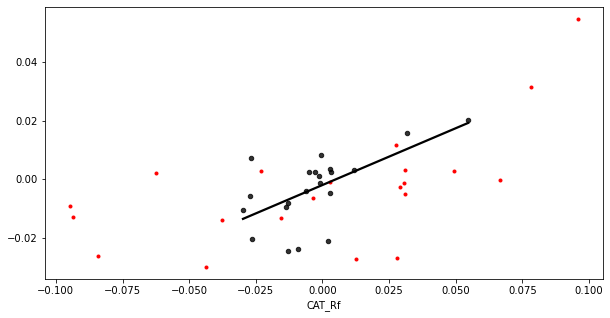

In [92]:
plt.figure(figsize=(10,5))
plt.plot(merge['Mkt_RF'], CAT_Rf_y, 'r.')
sns.regplot(x=CAT_Rf_y, y= CAT_predicted, data=merge, ci=None, scatter_kws={"s": 80}, marker=".", color='black')

# **TSLA STOCK**

**CAMP**

In [77]:
# construct independent variable:
TSLA_Rf_Xx = merge['Mkt_RF']

# construct dependent variable:
TSLA_Rf_yy = merge['TSLA_Rf']

# add constant:
TSLA_Rf_X11 = sm.add_constant(TSLA_Rf_Xx)

# run regression:
TSLA_model1 = sm.OLS(TSLA_Rf_yy, TSLA_Rf_X11).fit()

# output results:
print(TSLA_model1.summary())

#GOOG_intercept and GOOG_beta
TSLA_intercept1, TSLA_beta = TSLA_model1.params

# predict GOOG_predicted
TSLA_predicted = TSLA_model1._results.predict(TSLA_Rf_X11)

                            OLS Regression Results                            
Dep. Variable:                TSLA_Rf   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                 -0.014
Method:                 Least Squares   F-statistic:                    0.7160
Date:                Sun, 18 Dec 2022   Prob (F-statistic):              0.408
Time:                        13:09:48   Log-Likelihood:                 41.906
No. Observations:                  21   AIC:                            -79.81
Df Residuals:                      19   BIC:                            -77.72
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0145      0.008      1.915      0.0

In [78]:
rf = merge['RF'].mean()
market_premium = merge['Mkt_RF'].mean()

expected_monthly_return = rf + TSLA_beta * market_premium 
expected_yearly_return = expected_monthly_return * 12

print("Expected monthly return: %f"%(expected_monthly_return))
print("Expected yearly return: %f"%(expected_yearly_return))

Expected monthly return: 0.000522
Expected yearly return: 0.006263


**Fama French 3 Model**

In [79]:
# construct independent variable:
TSLA_Rf_X = merge[['Mkt_RF','SMB','HML']]

# construct dependent variable:
TSLA_Rf_y = merge['TSLA_Rf']

# add constant:
TSLA_Rf_X1 = sm.add_constant(TSLA_Rf_X  )

# run regression:
TSLA_model = sm.OLS(TSLA_Rf_y, TSLA_Rf_X1).fit()

# output results:
print(TSLA_model.summary())

#GOOG_intercept and GOOG_beta
TSLA_intercept, TSLA_beta1, TSLA_beta2, TSLA_beta3 = TSLA_model.params

# predict GOOG_predicted
TSLA_predicted = TSLA_model._results.predict(TSLA_Rf_X1)

                            OLS Regression Results                            
Dep. Variable:                TSLA_Rf   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     1.326
Date:                Sun, 18 Dec 2022   Prob (F-statistic):              0.299
Time:                        13:09:55   Log-Likelihood:                 43.726
No. Observations:                  21   AIC:                            -79.45
Df Residuals:                      17   BIC:                            -75.27
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0089      0.008      1.112      0.2

C:\Users\PC\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [80]:
rf = merge['RF'].mean()
market_premium = merge['Mkt_RF'].mean()
size_premium = merge['SMB'].mean()
value_premium = merge['HML'].mean()

expected_monthly_return = rf + TSLA_beta1 * market_premium + TSLA_beta2 * size_premium + TSLA_beta3 * value_premium
expected_yearly_return = expected_monthly_return * 12

print("Expected monthly return: %f"%(expected_monthly_return))
print("Expected yearly return: %f"%(expected_yearly_return))

Expected monthly return: 0.006045
Expected yearly return: 0.072537


<AxesSubplot:xlabel='TSLA_Rf'>

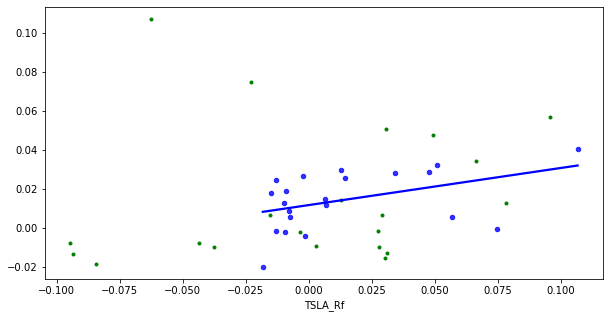

In [81]:
plt.figure(figsize=(10,5))
plt.plot(merge['Mkt_RF'], TSLA_Rf_y, 'g.')
sns.regplot(x=TSLA_Rf_y, y= TSLA_predicted, data=merge, ci=None, scatter_kws={"s": 80}, marker=".", color='blue')

# **MSFT STOCK**

**CAMP**

In [82]:
# construct independent variable:
MSFT_Rf_Xx = merge['Mkt_RF']

# construct dependent variable:
MSFT_Rf_yy = merge['MSFT_Rf']

# add constant:
MSFT_Rf_X11 = sm.add_constant(MSFT_Rf_Xx)

# run regression:
MSFT_model1 = sm.OLS(MSFT_Rf_yy, MSFT_Rf_X11).fit()

# output results:
print(MSFT_model1.summary())

#GOOG_intercept and GOOG_beta
MSFT_intercept1, MSFT_beta = MSFT_model1.params

# predict MSFT_predicted
MSFT_predicted = MSFT_model1._results.predict(MSFT_Rf_X11)

                            OLS Regression Results                            
Dep. Variable:                MSFT_Rf   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.439
Method:                 Least Squares   F-statistic:                     16.64
Date:                Sun, 18 Dec 2022   Prob (F-statistic):           0.000640
Time:                        13:12:56   Log-Likelihood:                 62.421
No. Observations:                  21   AIC:                            -120.8
Df Residuals:                      19   BIC:                            -118.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0019      0.003     -0.657      0.5

C:\Users\PC\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [83]:
rf = merge['RF'].mean()
market_premium = merge['Mkt_RF'].mean()

expected_monthly_return = rf + MSFT_beta * market_premium 
expected_yearly_return = expected_monthly_return * 12

print("Expected monthly return: %f"%(expected_monthly_return))
print("Expected yearly return: %f"%(expected_yearly_return))

Expected monthly return: 0.000633
Expected yearly return: 0.007594


**Fama French 3 Model**

In [84]:
# construct independent variable:
MSFT_Rf_X = merge[['Mkt_RF','SMB','HML']]

# construct dependent variable:
MSFT_Rf_y = merge['MSFT_Rf']

# add constant:
MSFT_Rf_X1 = sm.add_constant(MSFT_Rf_X  )

# run regression:
MSFT_model = sm.OLS(MSFT_Rf_y, MSFT_Rf_X1).fit()

# output results:
print(MSFT_model.summary())

#GOOG_intercept and GOOG_beta
MSFT_intercept, MSFT_beta1, MSFT_beta2, MSFT_beta3 = MSFT_model.params

# predict MSFT_predicted
MSFT_predicted = MSFT_model._results.predict(MSFT_Rf_X1)

                            OLS Regression Results                            
Dep. Variable:                MSFT_Rf   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     9.120
Date:                Sun, 18 Dec 2022   Prob (F-statistic):           0.000801
Time:                        13:12:59   Log-Likelihood:                 65.888
No. Observations:                  21   AIC:                            -123.8
Df Residuals:                      17   BIC:                            -119.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0039      0.003     -1.402      0.1

C:\Users\PC\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [85]:
rf = merge['RF'].mean()
market_premium = merge['Mkt_RF'].mean()
size_premium = merge['SMB'].mean()
value_premium = merge['HML'].mean()

expected_monthly_return = rf + MSFT_beta1 * market_premium + MSFT_beta2 * size_premium + MSFT_beta3 * value_premium
expected_yearly_return = expected_monthly_return * 12

print("Expected monthly return: %f"%(expected_monthly_return))
print("Expected yearly return: %f"%(expected_yearly_return))

Expected monthly return: 0.002687
Expected yearly return: 0.032249


<AxesSubplot:xlabel='MSFT_Rf'>

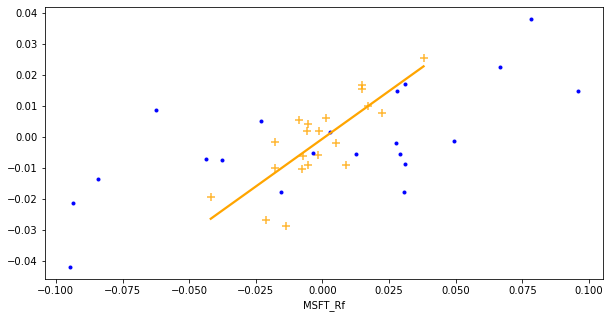

In [86]:
plt.figure(figsize=(10,5))
plt.plot(merge['Mkt_RF'], MSFT_Rf_y, 'b.')
sns.regplot(x=MSFT_Rf_y, y= MSFT_predicted, data=merge, ci=None, scatter_kws={"s": 80}, marker="+", color='orange')

# **AAPL STOCK**

**CAMP**

In [95]:
# construct independent variable:
AAPl_Rf_Xx = merge['Mkt_RF']

# construct dependent variable:
AAPl_Rf_yy = merge['AAPl_Rf']

# add constant:
AAPl_Rf_X11 = sm.add_constant(AAPl_Rf_Xx)

# run regression:
AAPl_model1 = sm.OLS(AAPl_Rf_yy, AAPl_Rf_X11).fit()

# output results:
print(AAPl_model1.summary())

#AAPl_intercept and AAPl_beta
AAPl_intercept1, AAPl_beta = AAPl_model1.params

# predict AAPl_predicted
AAPl_predicted1 = AAPl_model1._results.predict(AAPl_Rf_X11)

                            OLS Regression Results                            
Dep. Variable:                AAPl_Rf   R-squared:                       0.242
Model:                            OLS   Adj. R-squared:                  0.202
Method:                 Least Squares   F-statistic:                     6.067
Date:                Sun, 18 Dec 2022   Prob (F-statistic):             0.0235
Time:                        13:20:00   Log-Likelihood:                 51.149
No. Observations:                  21   AIC:                            -98.30
Df Residuals:                      19   BIC:                            -96.21
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0001      0.005      0.030      0.9

C:\Users\PC\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [97]:
rf = merge['RF'].mean()
market_premium = merge['Mkt_RF'].mean()

expected_monthly_return = rf + AAPl_beta * market_premium 
expected_yearly_return = expected_monthly_return * 12

print("Expected monthly return: %f"%(expected_monthly_return))
print("Expected yearly return: %f"%(expected_yearly_return))

Expected monthly return: 0.000641
Expected yearly return: 0.007692


**Fama French 3 Model**

In [111]:
# construct independent variable:
AAPl_Rf_X = merge[['Mkt_RF','SMB','HML']]

# construct dependent variable:
AAPl_Rf_y = merge['AAPl_Rf']

# add constant:
AAPl_Rf_X1 = sm.add_constant(AAPl_Rf_X  )

# run regression:
AAPl_model = sm.OLS(AAPl_Rf_y, AAPl_Rf_X1).fit()

# output results:
print(AAPl_model.summary())

#AAPl_intercept and AAPl_beta
AAPl_intercept, AAPl_beta1, AAPl_beta2, AAPl_beta3 = AAPl_model.params

# predict MSFT_predicted
AAPl_predicted = AAPl_model._results.predict(AAPl_Rf_X1)

                            OLS Regression Results                            
Dep. Variable:                AAPl_Rf   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     3.282
Date:                Sun, 18 Dec 2022   Prob (F-statistic):             0.0464
Time:                        13:22:23   Log-Likelihood:                 53.037
No. Observations:                  21   AIC:                            -98.07
Df Residuals:                      17   BIC:                            -93.90
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0028      0.005     -0.538      0.5

C:\Users\PC\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [112]:
rf = merge['RF'].mean()
market_premium = merge['Mkt_RF'].mean()
size_premium = merge['SMB'].mean()
value_premium = merge['HML'].mean()

expected_monthly_return = rf + AAPl_beta1 * market_premium + AAPl_beta2 * size_premium + AAPl_beta3 * value_premium
expected_yearly_return = expected_monthly_return * 12

print("Expected monthly return: %f"%(expected_monthly_return))
print("Expected yearly return: %f"%(expected_yearly_return))

Expected monthly return: 0.003556
Expected yearly return: 0.042673


# Visualization Regression

<AxesSubplot:xlabel='AAPl_Rf'>

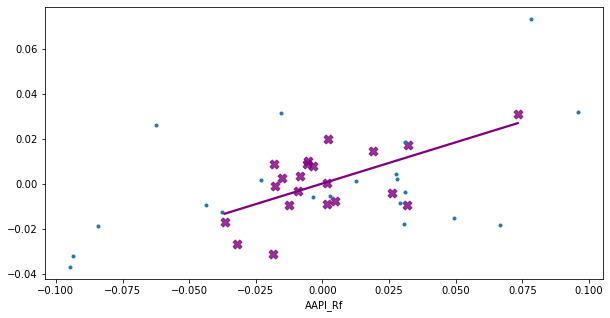

In [113]:
plt.figure(figsize=(10,5))
plt.plot(merge['Mkt_RF'], AAPl_Rf_y, '.')
sns.regplot(x=AAPl_Rf_y, y= AAPl_predicted, data=merge, ci=None, scatter_kws={"s": 80}, marker="X", color='purple')

<AxesSubplot:xlabel='CAT_Rf'>

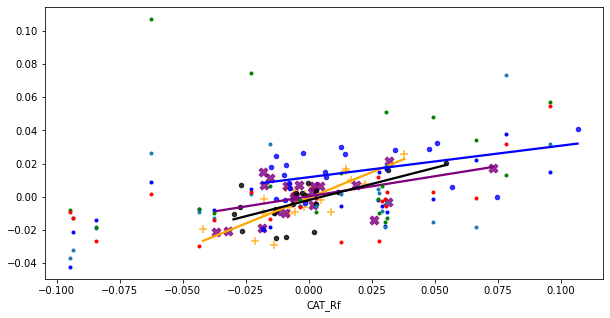

In [114]:
plt.figure(figsize=(10,5))
plt.plot(merge['Mkt_RF'], MSFT_Rf_yy, 'b.')
sns.regplot(x=MSFT_Rf_yy, y= MSFT_predicted, data=merge, ci=None, scatter_kws={"s": 80}, marker="+", color='orange')

plt.plot(merge['Mkt_RF'], AAPl_Rf_yy, '.')
sns.regplot(x=AAPl_Rf_yy, y= AAPl_predicted1, data=merge, ci=None, scatter_kws={"s": 80}, marker="X", color='purple')

plt.plot(merge['Mkt_RF'], TSLA_Rf_yy, 'g.')
sns.regplot(x=TSLA_Rf_yy, y= TSLA_predicted, data=merge, ci=None, scatter_kws={"s": 80}, marker=".", color='blue')

plt.plot(merge['Mkt_RF'], CAT_Rf_yy, 'r.')
sns.regplot(x=CAT_Rf_yy, y= CAT_predicted, data=merge, ci=None, scatter_kws={"s": 80}, marker=".", color='black')

# 7. Conduct relevant hypothesis tests for the validity of the asset pricing models for a single stocks and for the whole data sample and discuss your results

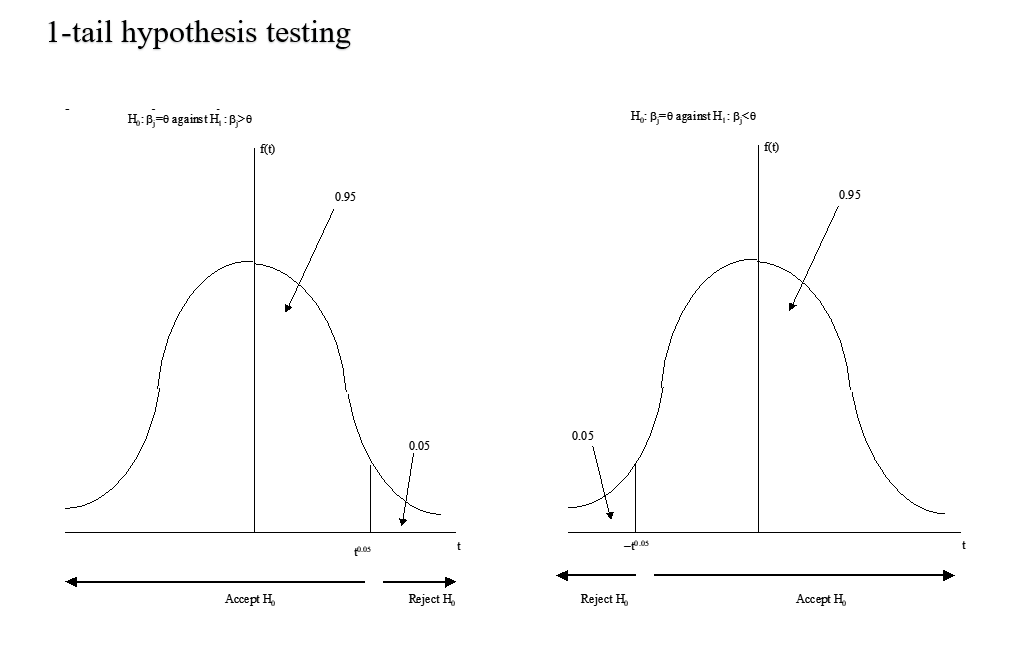

# SINGLE STOCK HYPOTHESIS TESTING

In [115]:
#Hypothesis test on GOOG stock
#Declaration of GOOG hypothesis t-test value
GOOG_model_hypothesis = 'Mkt_RF=0'

#perform t-test
GOOG_model.t_test(GOOG_model_hypothesis).summary()

,coef,std err,t,P>|t|,[0.025,0.975]
c0,0.2266,0.048,4.717,0.000,0.125,0.328


In [116]:
#F_test on GOOG stock
GOOG_hypothesis02 = 'Mkt_RF=SMB=HML=0'
GOOG_model.f_test(GOOG_hypothesis02)

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[10.31786057]]), p=0.00042117635547313166, df_denom=17, df_num=3>

# Multiple stock hypothesis testing

In [117]:
#Hypothesis test on AAPL stock return

AAPl_hypothesis = 'Mkt_RF=0'

#perform t-test on AAPL stock return
AAPl_model.t_test(AAPl_hypothesis).summary()

,coef,std err,t,P>|t|,[0.025,0.975]
c0,0.2451,0.089,2.768,0.013,0.058,0.432


In [118]:
#F_test on AAPL stock return
AAPl_hypothesis02 = 'Mkt_RF=SMB=HML=0'
AAPl_model.f_test(AAPl_hypothesis02)

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[3.28178378]]), p=0.046399857636994515, df_denom=17, df_num=3>

In [119]:
#Hypothesis test on MSFT stock return
MSFT_hypothesis = 'Mkt_RF=0'

#perform t-test on MSFT return
MSFT_model.t_test(MSFT_hypothesis).summary()

,coef,std err,t,P>|t|,[0.025,0.975]
c0,0.2322,0.048,4.836,0.000,0.131,0.334


In [120]:
#F_test on MSFT stock return
MSFT_hypothesis02 = 'Mkt_RF=SMB=HML=0'
MSFT_model.f_test(MSFT_hypothesis02)

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[9.12004395]]), p=0.0008010175464139585, df_denom=17, df_num=3>

In [121]:
#Hypothesis test on TSLA stock return
TSLA_hypothesis = 'Mkt_RF=0'

#perform t-test on TSLA stock return
TSLA_model.t_test(TSLA_hypothesis).summary()

,coef,std err,t,P>|t|,[0.025,0.975]
c0,0.1463,0.138,1.061,0.304,-0.145,0.437


In [122]:
#F_test on TSLA stock return
TSLA_hypothesis02 = 'Mkt_RF=SMB=HML=0'
TSLA_model.f_test(TSLA_hypothesis02)

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[1.32616661]]), p=0.2986860925839583, df_denom=17, df_num=3>

In [123]:
#Hypothesis test on CAT stock return
CAT_hypothesis = 'Mkt_RF=0'

#perform t-test CAT stock return
CAT_model.t_test(CAT_hypothesis).summary()

,coef,std err,t,P>|t|,[0.025,0.975]
c0,0.2173,0.068,3.177,0.006,0.073,0.362


In [124]:
#F_test on CAT stock return
CAT_hypothesis02 = 'Mkt_RF=SMB=HML=0'
CAT_model.f_test(CAT_hypothesis02)

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[3.59488548]]), p=0.03540682665342358, df_denom=17, df_num=3>